# Pandas 통계, 결측치 처리, 그룹핑

In [1]:
import pandas as pd

<br/>
<br/>
<br/>
<br/>

### 데이터 읽기

In [2]:
# 'dataset' 폴더 안의 '따릉이.csv' 파일을 읽으세요.
df = pd.read_csv('따릉이.csv',encoding='cp949')
df

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,5,NaN,no,0.3,78.0,1521.0,0.021,28.0,28.0,8
1,22,20.2,no,2.8,54.0,2000.0,0.022,28.0,21.0,195
2,11,24.4,no,1.9,41.0,1362.0,0.035,48.0,27.0,90
3,11,15.0,no,1.4,50.0,1517.0,0.030,48.0,24.0,86
4,2,13.6,no,1.7,80.0,1073.0,0.027,34.0,15.0,39
...,...,...,...,...,...,...,...,...,...,...
1054,13,21.2,no,4.2,26.0,1542.0,0.056,129.0,27.0,108
1055,2,11.3,no,1.6,71.0,791.0,0.027,74.0,34.0,66
1056,17,25.7,no,3.5,35.0,1951.0,0.069,51.0,27.0,200
1057,12,NaN,no,1.8,29.0,869.0,0.032,73.0,33.0,129


In [3]:
# 기본 정보를 조회하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           1059 non-null   int64  
 1   temperature    794 non-null    float64
 2   precipitation  1059 non-null   object 
 3   windspeed      1059 non-null   float64
 4   humidity       932 non-null    float64
 5   visibility     1059 non-null   float64
 6   ozone          1059 non-null   float64
 7   pm10           1059 non-null   float64
 8   pm2.5          1059 non-null   float64
 9   count          1059 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 82.9+ KB


In [4]:
# 행과 열의 개수를 구하세요.
df.shape

(1059, 10)

<br/>
<br/>
<br/>
<br/>

### 통계 구하기

In [5]:
# 'precipitation' 열의 값의 빈도수를 구하세요.
df.groupby(['precipitation'])['precipitation'].count()

precipitation
no     1027
yes      32
Name: precipitation, dtype: int64

In [6]:
# 비가 온 날의 대여량 평균을 구하세요.
cond = df['precipitation'] == 'yes'
df[cond]['count'].mean()

30.09375

In [7]:
# 비가 안 온 날의 대여량 평균을 구하세요.
df[~cond]['count'].mean()

115.3777994157741

In [8]:
# 비가 온 날의 풍속, 가시거리, 대여량의 평균과 최대값을 구하세요.
df[cond][['windspeed','visibility','count']].agg(['mean','max'])

,windspeed,visibility,count
mean,2.471875,750.90625,30.09375
max,8.000000,2000.00000,134.00000


In [9]:
# 비가 안 온 날의 풍속, 가시거리, 대여량의 평균과 최대값을 구하세요.
df[~cond][['windspeed','visibility','count']].agg(['mean','max'])

,windspeed,visibility,count
mean,2.504479,1435.833496,115.377799
max,7.700000,2000.000000,431.000000


<br/>
<br/>
<br/>
<br/>

### 결측치 처리

In [10]:
# 각 열 별 결측치 개수를 구하세요.
df.isnull().sum()

hour               0
temperature      265
precipitation      0
windspeed          0
humidity         127
visibility         0
ozone              0
pm10               0
pm2.5              0
count              0
dtype: int64

In [11]:
# 각 행 별 결측치 개수를 구하세요.
df.isnull().sum(axis=1)

0       1
1       0
2       0
3       0
4       0
       ..
1054    0
1055    0
1056    0
1057    1
1058    0
Length: 1059, dtype: int64

In [12]:
# 결측치 총 개수를 구하세요.
df.isnull().sum().sum()

392

<br/>
<br/>

- 결측치 제거

In [13]:
# df의 결측치가 존재하는 행을 제거한 후 df2에 저장하세요.
df2 = df.dropna()
df.shape, df2.shape

((1059, 10), (700, 10))

In [14]:
# df의 결측치가 존재하는 열을 제거한 후 df3에 저장하세요.
df3 = df.dropna(axis=1)
df.shape, df3.shape

((1059, 10), (1059, 8))

In [15]:
# df3의 상위 5개 행을 조회하세요.
df3.head()

,hour,precipitation,windspeed,visibility,ozone,pm10,pm2.5,count
0,5,no,0.3,1521.0,0.021,28.0,28.0,8
1,22,no,2.8,2000.0,0.022,28.0,21.0,195
2,11,no,1.9,1362.0,0.035,48.0,27.0,90
3,11,no,1.4,1517.0,0.030,48.0,24.0,86
4,2,no,1.7,1073.0,0.027,34.0,15.0,39


<br/>
<br/>

- 결측치 채우기

In [16]:
# df를 복사하여 df4에 저장하세요.
df4 = df.copy()
df4

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,5,NaN,no,0.3,78.0,1521.0,0.021,28.0,28.0,8
1,22,20.2,no,2.8,54.0,2000.0,0.022,28.0,21.0,195
2,11,24.4,no,1.9,41.0,1362.0,0.035,48.0,27.0,90
3,11,15.0,no,1.4,50.0,1517.0,0.030,48.0,24.0,86
4,2,13.6,no,1.7,80.0,1073.0,0.027,34.0,15.0,39
...,...,...,...,...,...,...,...,...,...,...
1054,13,21.2,no,4.2,26.0,1542.0,0.056,129.0,27.0,108
1055,2,11.3,no,1.6,71.0,791.0,0.027,74.0,34.0,66
1056,17,25.7,no,3.5,35.0,1951.0,0.069,51.0,27.0,200
1057,12,NaN,no,1.8,29.0,869.0,0.032,73.0,33.0,129


In [17]:
# df4의 'temperature' 열이 결측치인 행을 조회하세요.
df4[df4['temperature'].isna()]

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,5,NaN,no,0.3,78.0,1521.0,0.021,28.0,28.0,8
5,10,NaN,no,1.4,54.0,990.0,0.016,35.0,23.0,90
9,14,NaN,no,4.9,52.0,1331.0,0.063,53.0,28.0,130
12,4,NaN,yes,3.4,98.0,137.0,0.040,24.0,24.0,2
17,23,NaN,no,1.4,47.0,2000.0,0.046,45.0,23.0,114
...,...,...,...,...,...,...,...,...,...,...
1030,3,NaN,no,2.7,59.0,1529.0,0.025,65.0,31.0,32
1047,14,NaN,no,5.7,40.0,1971.0,0.050,61.0,16.0,268
1051,4,NaN,no,2.4,40.0,2000.0,0.042,33.0,25.0,5
1053,3,NaN,no,1.1,54.0,848.0,0.007,81.0,73.0,8


In [18]:
# 위에서 구한 데이터프레임의 인덱스를 idx에 저장하세요.
idx = df4[df4['temperature'].isna()].index
idx

Int64Index([   0,    5,    9,   12,   17,   19,   20,   23,   31,   33,
            ...
            1016, 1023, 1026, 1028, 1029, 1030, 1047, 1051, 1053, 1057],
           dtype='int64', length=265)

In [19]:
# df4의 'temperature' 열의 결측치를 평균으로 채우세요.
df4['temperature'] = df4['temperature'].fillna(df4['temperature'].mean())
df4.loc[idx, :]

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,5,16.788287,no,0.3,78.0,1521.0,0.021,28.0,28.0,8
5,10,16.788287,no,1.4,54.0,990.0,0.016,35.0,23.0,90
9,14,16.788287,no,4.9,52.0,1331.0,0.063,53.0,28.0,130
12,4,16.788287,yes,3.4,98.0,137.0,0.040,24.0,24.0,2
17,23,16.788287,no,1.4,47.0,2000.0,0.046,45.0,23.0,114
...,...,...,...,...,...,...,...,...,...,...
1030,3,16.788287,no,2.7,59.0,1529.0,0.025,65.0,31.0,32
1047,14,16.788287,no,5.7,40.0,1971.0,0.050,61.0,16.0,268
1051,4,16.788287,no,2.4,40.0,2000.0,0.042,33.0,25.0,5
1053,3,16.788287,no,1.1,54.0,848.0,0.007,81.0,73.0,8


In [20]:
# df4의 'humidity' 열이 결측치인 행을 조회하세요.
df4[df4['humidity'].isna()]

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
10,10,8.700000,no,0.6,NaN,1949.0,0.018,21.0,20.0,61
13,8,11.600000,no,2.0,NaN,1143.0,0.010,64.0,51.0,35
34,21,19.200000,no,4.1,NaN,2000.0,0.051,38.0,20.0,166
75,21,18.800000,no,4.6,NaN,2000.0,0.039,32.0,20.0,189
85,4,16.788287,no,1.7,NaN,669.0,0.020,103.0,62.0,20
...,...,...,...,...,...,...,...,...,...,...
1000,18,16.800000,no,3.6,NaN,1730.0,0.050,71.0,25.0,273
1006,13,18.600000,no,6.0,NaN,1980.0,0.046,58.0,16.0,188
1011,12,18.700000,no,4.6,NaN,1812.0,0.045,51.0,22.0,125
1031,5,18.300000,no,1.9,NaN,2000.0,0.009,30.0,21.0,22


In [21]:
# 위에서 구한 데이터프레임의 인덱스를 idx에 저장하세요.
idx =  df4[df4['humidity'].isna()].index
idx

Int64Index([  10,   13,   34,   75,   85,   95,   98,  102,  109,  113,
            ...
             969,  983,  995,  996,  997, 1000, 1006, 1011, 1031, 1038],
           dtype='int64', length=127)

In [22]:
# df4의 'humidity' 열의 결측치를 중앙값으로 채우세요.
df4['humidity'] = df4['humidity'].fillna(df4['humidity'].median())
df4.loc[idx, :]

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
10,10,8.700000,no,0.6,50.0,1949.0,0.018,21.0,20.0,61
13,8,11.600000,no,2.0,50.0,1143.0,0.010,64.0,51.0,35
34,21,19.200000,no,4.1,50.0,2000.0,0.051,38.0,20.0,166
75,21,18.800000,no,4.6,50.0,2000.0,0.039,32.0,20.0,189
85,4,16.788287,no,1.7,50.0,669.0,0.020,103.0,62.0,20
...,...,...,...,...,...,...,...,...,...,...
1000,18,16.800000,no,3.6,50.0,1730.0,0.050,71.0,25.0,273
1006,13,18.600000,no,6.0,50.0,1980.0,0.046,58.0,16.0,188
1011,12,18.700000,no,4.6,50.0,1812.0,0.045,51.0,22.0,125
1031,5,18.300000,no,1.9,50.0,2000.0,0.009,30.0,21.0,22


<br/>
<br/>

- (참고) 시간 별 평균, 중앙값으로 채우기

In [23]:
# 코드를 실행하세요.
df5 = df.copy()
df5['temperature'] = df5['temperature'].fillna(df5.groupby('hour')['temperature'].transform('mean'))
df5['humidity'] = df5['humidity'].fillna(df5.groupby('hour')['humidity'].transform('median'))
df5

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,5,12.775676,no,0.3,78.0,1521.0,0.021,28.0,28.0,8
1,22,20.200000,no,2.8,54.0,2000.0,0.022,28.0,21.0,195
2,11,24.400000,no,1.9,41.0,1362.0,0.035,48.0,27.0,90
3,11,15.000000,no,1.4,50.0,1517.0,0.030,48.0,24.0,86
4,2,13.600000,no,1.7,80.0,1073.0,0.027,34.0,15.0,39
...,...,...,...,...,...,...,...,...,...,...
1054,13,21.200000,no,4.2,26.0,1542.0,0.056,129.0,27.0,108
1055,2,11.300000,no,1.6,71.0,791.0,0.027,74.0,34.0,66
1056,17,25.700000,no,3.5,35.0,1951.0,0.069,51.0,27.0,200
1057,12,19.600000,no,1.8,29.0,869.0,0.032,73.0,33.0,129


<br/>
<br/>
<br/>
<br/>

### 그룹핑

In [24]:
# df5에서 강수 별 대여량의 평균을 구하세요.
display(df5.groupby(['precipitation'])[['count']].mean())

,count
precipitation,
no,115.377799
yes,30.093750


In [25]:
# 비가 안 올 때, 시간대 별 대여량의 평균을 구하세요.
condition = df5['precipitation'] == 'no'
df5[condition].groupby(['hour'])[['count']].mean()

,count
hour,
0,74.707317
2,31.869565
3,22.266667
4,13.000000
5,13.775000
6,24.531915
7,58.690476
8,137.612245
9,96.888889


In [26]:
# 강수 별 시정의 최대값과 최소값을 구하세요.
display(df5.groupby(['precipitation'])[['visibility']].agg(['max','min']))

visibility       
                     max    min
precipitation                  
no                2000.0  107.0
yes               2000.0  106.0

In [27]:
# 위의 문제를 pd.pivot_table() 함수를 사용하여 구하세요.
display(df5.pivot_table(index=['precipitation'],values=['visibility'],aggfunc=['max','min']))

,max,min
,visibility,visibility
precipitation,,
no,2000.0,107.0
yes,2000.0,106.0


In [28]:
# 코드를 실행하세요.
# pd.qcut 함수를 사용하여 시정의 값을 6등분하여 'q_visibility' 열에 저장하세요.
df5['q_visibility'] = pd.qcut(df5['visibility'], 6, duplicates = 'drop', labels = False)
df5.head()

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count,q_visibility
0,5,12.775676,no,0.3,78.0,1521.0,0.021,28.0,28.0,8,2
1,22,20.200000,no,2.8,54.0,2000.0,0.022,28.0,21.0,195,4
2,11,24.400000,no,1.9,41.0,1362.0,0.035,48.0,27.0,90,2
3,11,15.000000,no,1.4,50.0,1517.0,0.030,48.0,24.0,86,2
4,2,13.600000,no,1.7,80.0,1073.0,0.027,34.0,15.0,39,1


In [29]:
# 'q_visibility' 별 대여량 평균을 구하세요.
df5.pivot_table(index=['q_visibility'],values=['count'],aggfunc=['mean'])    #pivot_table
df5.groupby(['q_visibility'])[['count']].agg('mean')                         #groupby

,count
q_visibility,
0,69.372881
1,96.406780
2,101.636364
3,118.392045
4,145.575071


In [30]:
# precipitation, q_visibility 별 대여량의 평균과 개수를 구하세요.
df5.groupby(['precipitation','q_visibility'])[['count']].agg(['mean','count'])                     #groupby

count      
                                  mean count
precipitation q_visibility                  
no            0              74.070064   157
              1              98.161850   173
              2             103.593023   172
              3             119.609195   174
              4             146.017094   351
yes           0              32.500000    20
              1              20.500000     4
              2              17.500000     4
              3              12.500000     2
              4              68.000000     2

In [31]:
# 위의 문제를 pd.pivot_table() 함수를 사용하여 구하세요.
df5.pivot_table(index=['precipitation','q_visibility'],values=['count'],aggfunc=['mean','count'])  #pivot_table

mean count
                                 count count
precipitation q_visibility                  
no            0              74.070064   157
              1              98.161850   173
              2             103.593023   172
              3             119.609195   174
              4             146.017094   351
yes           0              32.500000    20
              1              20.500000     4
              2              17.500000     4
              3              12.500000     2
              4              68.000000     2

<br/>
<br/>
<br/>
<br/>

### (참고) 시각화

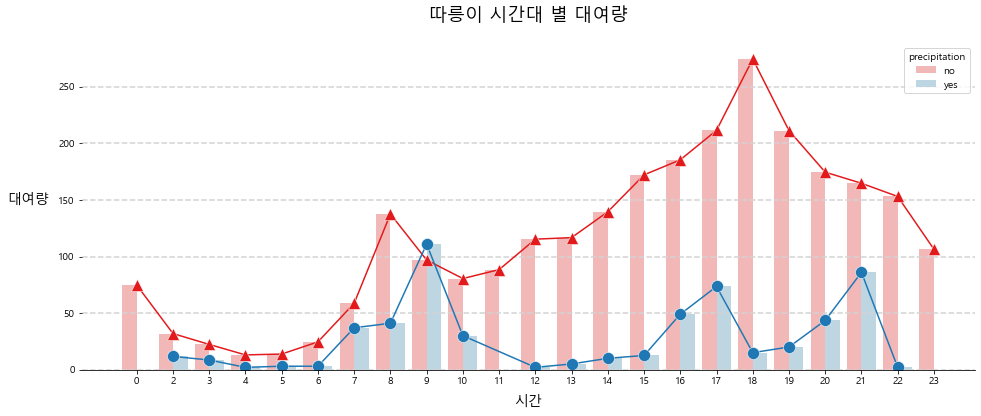

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트 설정
plt.rcParams['axes.spines.top'] = False # 위쪽 축 제거
plt.rcParams['axes.spines.right'] = False # 오른쪽 축 제거
plt.rcParams['axes.spines.left'] = False # 왼쪽 축 제거
plt.figure(figsize = (16, 6))
colors = sns.color_palette('Paired', 6)

# 그룹핑
df_group = df5.groupby(['precipitation', 'hour'])[['count']].mean().reset_index()
df_group

# bar plot
sns.barplot(data = df_group,
            x = 'hour', y = 'count', hue = 'precipitation', palette = [colors[4], colors[0]], alpha = 0.8)

# line plot
df_group['hour'] = df_group['hour'].apply(lambda x : x-1 if x > 1 else x)
sns.lineplot(data = df_group, x = 'hour', y = 'count', legend = False,
             hue = 'precipitation', palette = [colors[5], colors[1]],
             style = 'precipitation', markers = ["^", "o"], markersize = 12, markeredgewidth = 0.5,
             dashes = [(1,0), (1,0)])

# options
plt.title('따릉이 시간대 별 대여량', fontsize = 18, y = 1.05)
plt.xlabel('시간', fontsize = 14, labelpad = 10)
plt.ylabel('대여량', fontsize = 14, rotation = 0, labelpad = 30)
plt.grid(axis = 'y', color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.show()